# Case Study: Fashion Class Classification

# Step 1: Importing Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [14]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

# Step 2: Visualizing the DataSet

In [15]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [16]:
fashion_train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [17]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
fashion_train_df.shape

(60000, 785)

In [20]:
fashion_test_df.shape

(10000, 785)

In [21]:
training = np.array(fashion_train_df, dtype="float32")

In [22]:
testing = np.array(fashion_test_df, dtype="float32")

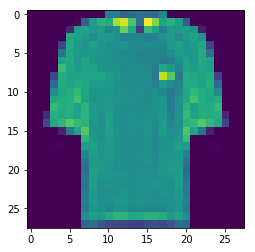

In [23]:
plt.imshow(training[102, 1:].reshape(28,28))

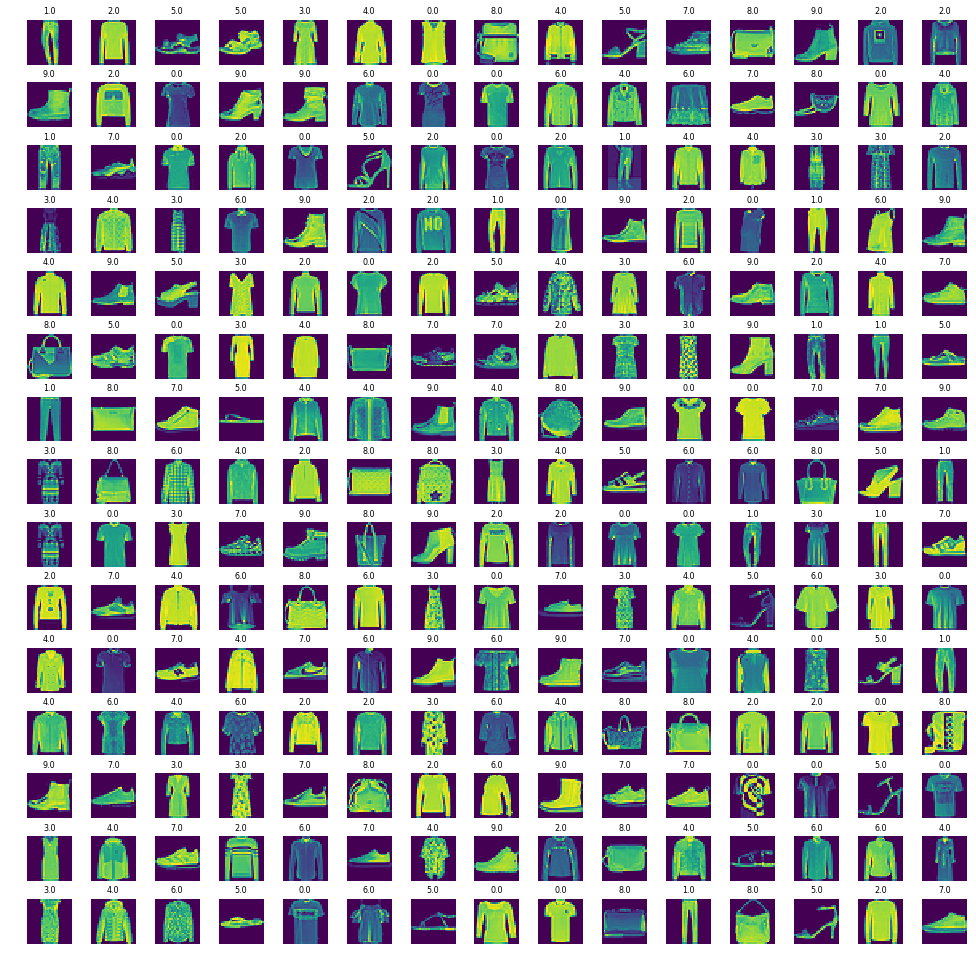

In [24]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, L_grid* W_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Step 3: Training the Model

In [25]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [26]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [29]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [30]:
X_train.shape

(48000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

In [32]:
X_validate.shape

(12000, 28, 28, 1)

In [33]:
import keras

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [35]:
cnn_model = Sequential()

In [36]:
cnn_model.add(Conv2D(32, 3,3, input_shape= (28,28,1), activation='relu'))

C:\Users\Zubair Akhtar\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [37]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
cnn_model.add(Flatten())

In [39]:
cnn_model.add(Dense(output_dim=32, activation="relu"))

C:\Users\Zubair Akhtar\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [40]:
cnn_model.add(Dense(output_dim=10, activation="sigmoid"))

C:\Users\Zubair Akhtar\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [41]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [42]:
epochs = 50

In [43]:
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch = epochs, verbose=1, validation_data=(X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\Zubair Akhtar\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 31s 639us/step - loss: 0.8582 - acc: 0.7227 - val_loss: 0.4913 - val_acc: 0.8298
Epoch 2/50
48000/48000 [==============================] - 28s 593us/step - loss: 0.4461 - acc: 0.8465 - val_loss: 0.4034 - val_acc: 0.8647
Epoch 3/50
48000/48000 [==============================] - 28s 577us/step - loss: 0.3896 - acc: 0.8649 - val_loss: 0.3691 - val_acc: 0.8746
Epoch 4/50
48000/48000 [==============================] - 27s 564us/step - loss: 0.3606 - acc: 0.8756 - val_loss: 0.3513 - val_acc: 0.8783
Epoch 5/50
48000/48000 [==============================] - 27s 561us/step - loss: 0.3326 - acc: 0.8839 - val_loss: 0.3323 - val_acc: 0.8848
Epoch 6/50
48000/48000 [==============================] - 27s 565us/step - loss: 0.3185 - acc: 0.8904 - val_loss: 0.3297 - val_acc: 0.8854
Epoch 7/50
48000/48000 [==============================] - 27s 571us/step - loss: 0.3028 - acc: 0.8951 - val_loss: 0.

C:\Users\Zubair Akhtar\.conda\envs\tensorflow_env\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.268750). Check your callbacks.
  % delta_t_median)


48000/48000 [==============================] - 30s 625us/step - loss: 0.1620 - acc: 0.9440 - val_loss: 0.2575 - val_acc: 0.9102
Epoch 35/50
48000/48000 [==============================] - 29s 598us/step - loss: 0.1578 - acc: 0.9451 - val_loss: 0.2468 - val_acc: 0.9131
Epoch 36/50
48000/48000 [==============================] - 27s 557us/step - loss: 0.1539 - acc: 0.9462 - val_loss: 0.2448 - val_acc: 0.9161
Epoch 37/50
48000/48000 [==============================] - 27s 562us/step - loss: 0.1504 - acc: 0.9477 - val_loss: 0.2491 - val_acc: 0.9143
Epoch 38/50
48000/48000 [==============================] - 30s 634us/step - loss: 0.1465 - acc: 0.9487 - val_loss: 0.2500 - val_acc: 0.9149
Epoch 39/50
48000/48000 [==============================] - 28s 573us/step - loss: 0.1444 - acc: 0.9499 - val_loss: 0.2498 - val_acc: 0.9148
Epoch 40/50
48000/48000 [==============================] - 27s 557us/step - loss: 0.1416 - acc: 0.9516 - val_loss: 0.2489 - val_acc: 0.9145
Epoch 41/50
48000/48000 [=======

# Step 4: Evaluating the model

In [44]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 228us/step
Test Accuracy : 0.913


In [45]:
predicted_classes = cnn_model_model.predict_classes(X_test)

In [46]:
predicted_classesicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

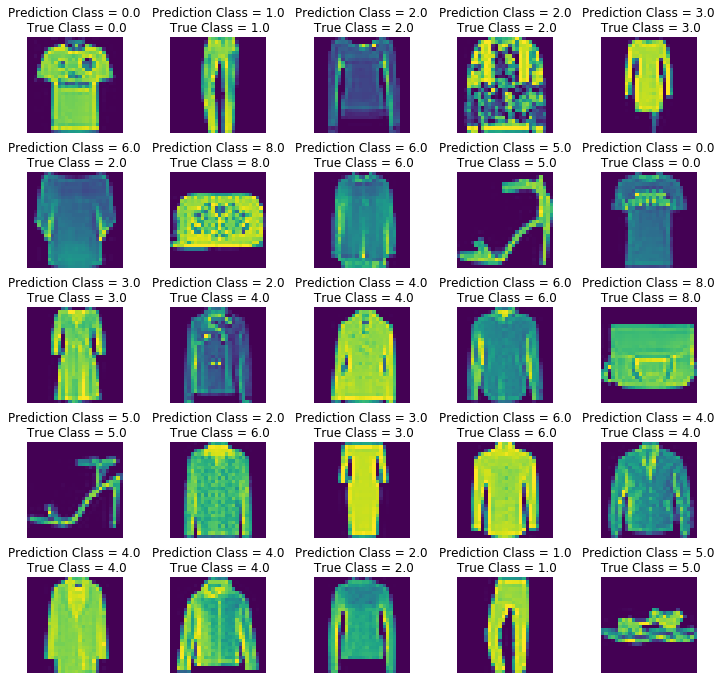

In [47]:
L = 5
W = 5

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in range.arange(0, L * W):
    
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[iy_testest[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

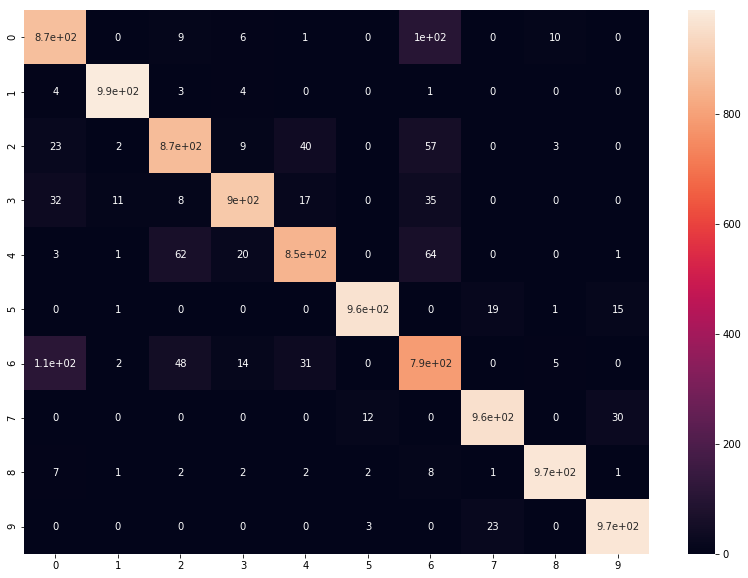

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [49]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes,  target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.87      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.90      0.85      0.88      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.75      0.79      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

